In [24]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the API key.
from config import weather_api_key
import requests
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

642

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
    # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
    # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puro
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | samusu
City not found. Skipping...
Processing Record 4 of Set 1 | broome
Processing Record 5 of Set 1 | chitral
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | brand-erbisdorf
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | lagoa
Processing Record 11 of Set 1 | ballina
Processing Record 12 of Set 1 | san quintin
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | north platte
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | zeya
Processing Record 18 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | upernavik
Processing Record 22 of Set 1 | h

In [11]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puro,12.4841,123.3827,82.63,77,77,3.69,PH,2022-07-23 13:21:44
1,Yellowknife,62.4560,-114.3525,63.12,72,75,13.80,CA,2022-07-23 13:21:44
2,Broome,42.2506,-75.8330,78.48,74,0,8.05,US,2022-07-23 13:21:45
3,Chitral,35.8462,71.7858,83.01,62,97,7.47,PK,2022-07-23 13:21:45
4,Vaini,-21.2000,-175.2000,69.96,83,20,9.22,TO,2022-07-23 13:21:45
5,Brand-Erbisdorf,50.8667,13.3333,72.50,65,80,10.38,DE,2022-07-23 13:21:46
6,Rikitea,-23.1203,-134.9692,71.44,74,5,10.56,PF,2022-07-23 13:21:46
7,Bluff,-46.6000,168.3333,35.80,79,31,6.87,NZ,2022-07-23 13:21:46
8,Lagoa,39.0500,-27.9833,72.25,87,46,7.56,PT,2022-07-23 13:21:47
9,Ballina,-28.8667,153.5667,57.02,99,19,13.96,AU,2022-07-23 13:21:47


In [13]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
ordered_city_data_df = city_data_df[new_column_order]
ordered_city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puro,PH,2022-07-23 13:21:44,12.4841,123.3827,82.63,77,77,3.69
1,Yellowknife,CA,2022-07-23 13:21:44,62.4560,-114.3525,63.12,72,75,13.80
2,Broome,US,2022-07-23 13:21:45,42.2506,-75.8330,78.48,74,0,8.05
3,Chitral,PK,2022-07-23 13:21:45,35.8462,71.7858,83.01,62,97,7.47
4,Vaini,TO,2022-07-23 13:21:45,-21.2000,-175.2000,69.96,83,20,9.22


In [14]:
#create the csv file
output_data_file = "weather_data/cities.csv"
#export the data into the csv
ordered_city_data_df.to_csv(output_data_file, index_label ="City_ID")

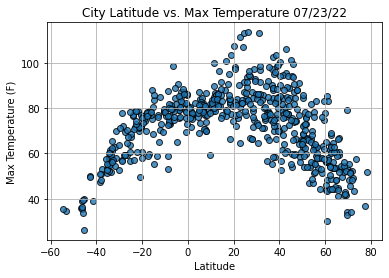

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]#import time module

import time
#build latitude vs. max temperature scatter
#add linear regression
#(slope,intercept,r_value,p_value,std_err) = linregress(lats,max_temps)
#regress_values = lats *slope + intercept
#line equation 
#line_eq ="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(lats,
            max_temps, edgecolor = "black", linewidths=1, marker ="o",alpha=0.8,label ="Cities")
plt.xlabel("Latitude")
#plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.ylabel("Max Temperature (F)")   
plt.title("City Latitude vs. Max Temperature "+time.strftime("%x"))
plt.grid(True)
plt.savefig("weather_data/Fig1.png")

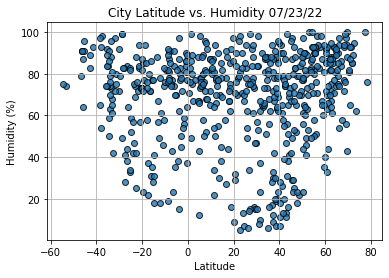

In [20]:
#build latitude vs. humidity scatter

plt.scatter(lats,
            humidity, edgecolor = "black", linewidths=1, marker ="o",alpha=0.8,label ="Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")   
plt.title("City Latitude vs. Humidity "+time.strftime("%x"))
plt.grid(True)
plt.savefig("weather_data/Fig2.png")

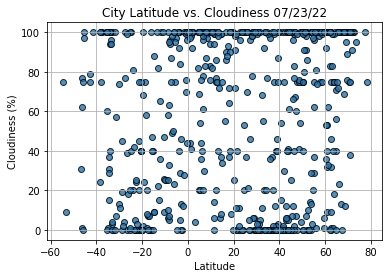

In [21]:
#build latitude vs. cloudiness scatter

plt.scatter(lats,
            cloudiness, edgecolor = "black", linewidths=1, marker ="o",alpha=0.8,label ="Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")   
plt.title("City Latitude vs. Cloudiness "+time.strftime("%x"))
plt.grid(True)
plt.savefig("weather_data/Fig3.png")

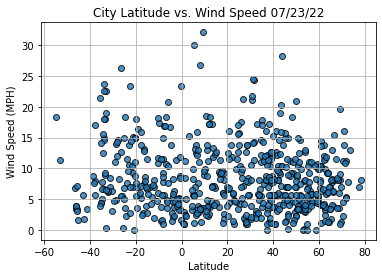

In [23]:
#build latitude vs. Wind Speed scatter

plt.scatter(lats,
            wind_speed, edgecolor = "black", linewidths=1, marker ="o",alpha=0.8,label ="Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")   
plt.title("City Latitude vs. Wind Speed "+time.strftime("%x"))
plt.grid(True)
plt.savefig("weather_data/Fig4.png")

In [29]:
#separate the dataframe into hemispheres
index13=ordered_city_data_df.loc[13]
index13

City                 North Platte
Country                        US
Date          2022-07-23 13:17:59
Lat                       41.1239
Lng                     -100.7654
Max Temp                    79.12
Humidity                       61
Cloudiness                      0
Wind Speed                  12.66
Name: 13, dtype: object

In [39]:
northern_hemi= ordered_city_data_df.loc[(ordered_city_data_df["Lat"]>=0)]
southern_hemi=ordered_city_data_df.loc[(ordered_city_data_df["Lat"]<0)]
print(northern_hemi.head())
print('______________________________________________________________________________')
print(southern_hemi.head())

              City Country                 Date      Lat       Lng  Max Temp  \
0             Puro      PH  2022-07-23 13:21:44  12.4841  123.3827     82.63   
1      Yellowknife      CA  2022-07-23 13:21:44  62.4560 -114.3525     63.12   
2           Broome      US  2022-07-23 13:21:45  42.2506  -75.8330     78.48   
3          Chitral      PK  2022-07-23 13:21:45  35.8462   71.7858     83.01   
5  Brand-Erbisdorf      DE  2022-07-23 13:21:46  50.8667   13.3333     72.50   

   Humidity  Cloudiness  Wind Speed  
0        77          77        3.69  
1        72          75       13.80  
2        74           0        8.05  
3        62          97        7.47  
5        65          80       10.38  
______________________________________________________________________________
       City Country                 Date      Lat       Lng  Max Temp  \
4     Vaini      TO  2022-07-23 13:21:45 -21.2000 -175.2000     69.96   
6   Rikitea      PF  2022-07-23 13:21:46 -23.1203 -134.9692     71

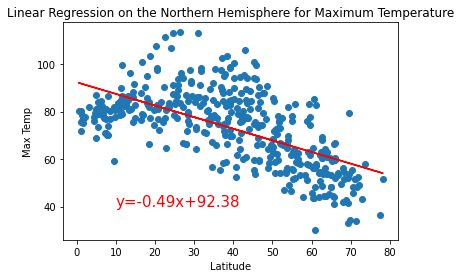

In [54]:
#linear regression on northern hemisphere
def plot_linear_regression(x_values, y_values,title,y_label,text_coordinates):
    (slope,intercept,r_value,p_value,std_err)=linregress(x_values,y_values)
    regress_values=x_values*slope+intercept
    line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
plot_linear_regression(northern_hemi["Lat"],northern_hemi["Max Temp"],"Linear Regression on the Northern Hemisphere for Maximum Temperature",
                       "Max Temp",(10,40))

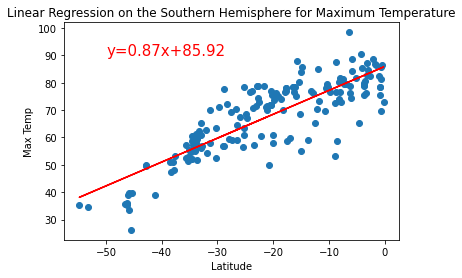

In [55]:
plot_linear_regression(southern_hemi["Lat"],southern_hemi["Max Temp"],"Linear Regression on the Southern Hemisphere for Maximum Temperature",
                       "Max Temp",(-50,90))


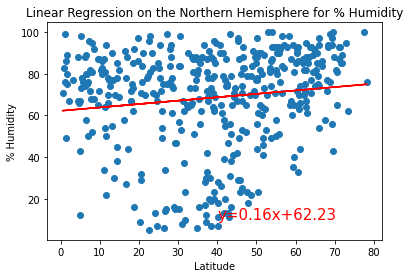

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

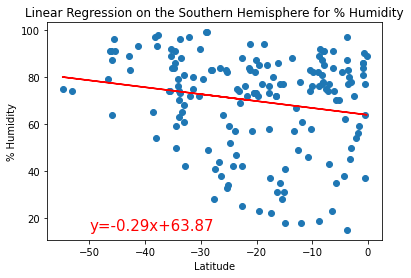

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

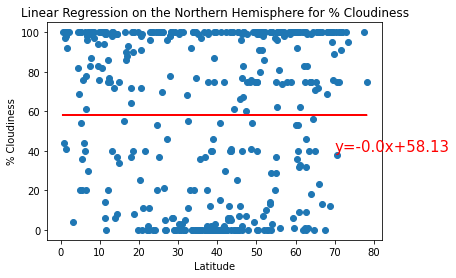

In [64]:
# Linear regression on the Northern Hemisphere for cloudiness
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(70,40))

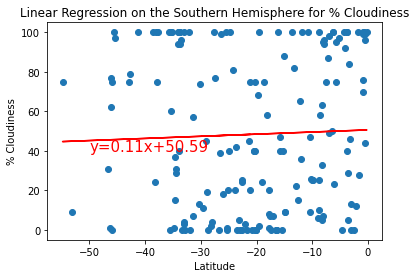

In [68]:
# Linear regression on the Northern Hemisphere for cloudiness
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,40))


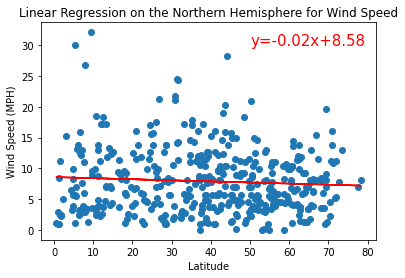

In [71]:
#linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed (MPH)',(50,30))

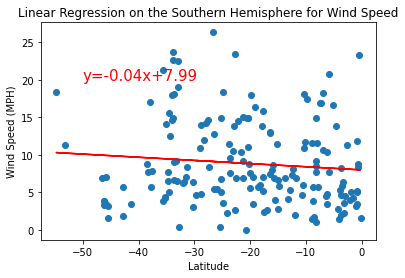

In [74]:
#linear regression on the Northern Hemisphere for Wind Speed
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed (MPH)',(-50,20))